In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [22]:
data=pd.read_csv('IKEA_SA_Furniture_Web_Scrapings_sss.csv')
data.head(2)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0


In [23]:
data=data.drop(columns=['Unnamed: 0','old_price','sellable_online','link','other_colors','short_description'])

In [24]:
data.head(2)

,item_id,name,category,price,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,Francis Cayouette,NaN,105.0,80.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   3694 non-null   int64  
 1   name      3694 non-null   object 
 2   category  3694 non-null   object 
 3   price     3694 non-null   float64
 4   designer  3694 non-null   object 
 5   depth     2231 non-null   float64
 6   height    2706 non-null   float64
 7   width     3105 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 231.0+ KB


In [26]:
data.depth=data.depth.fillna(data.depth.mean())

In [27]:
data.isnull().sum()

item_id       0
name          0
category      0
price         0
designer      0
depth         0
height      988
width       589
dtype: int64

In [28]:
data.height=data.height.fillna(data.height.mean())
data.width=data.width.fillna(data.width.mean())

In [29]:
data.isnull().sum()

item_id     0
name        0
category    0
price       0
designer    0
depth       0
height      0
width       0
dtype: int64

In [30]:
data['volume']=data['depth']*data['width']*data['height']
data=data.drop(columns=['depth','width','height'])
data.columns

Index(['item_id', 'name', 'category', 'price', 'designer', 'volume'], dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   3694 non-null   int64  
 1   name      3694 non-null   object 
 2   category  3694 non-null   object 
 3   price     3694 non-null   float64
 4   designer  3694 non-null   object 
 5   volume    3694 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 173.3+ KB


Text(0, 0.5, 'Frequency')

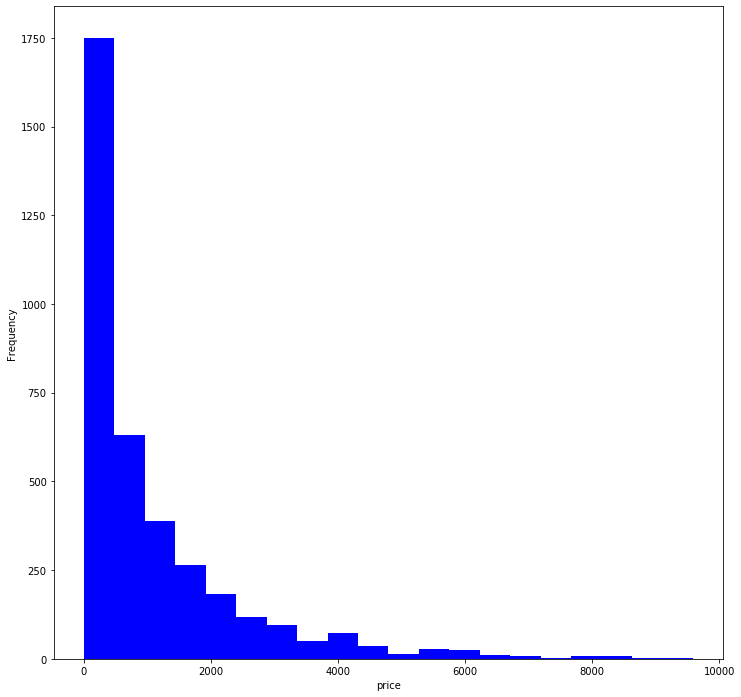

In [32]:
plt.figure(figsize=[12,12])
plt.hist(data['price'],bins=20,color='b')
plt.xlabel('price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

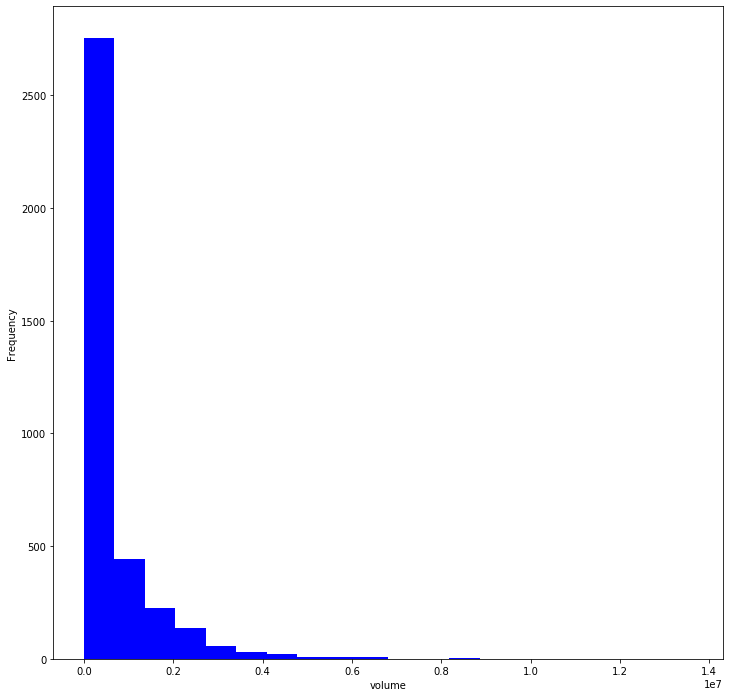

In [33]:
plt.figure(figsize=[12,12])
plt.hist(data['volume'],bins=20,color='b')
plt.xlabel('volume')
plt.ylabel('Frequency')

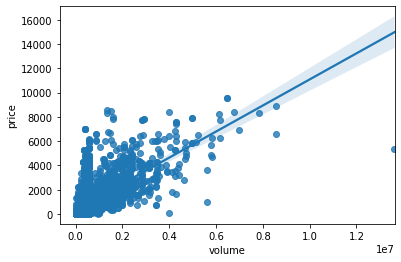

In [34]:
sns.regplot(x = 'volume', y = 'price', data=data)

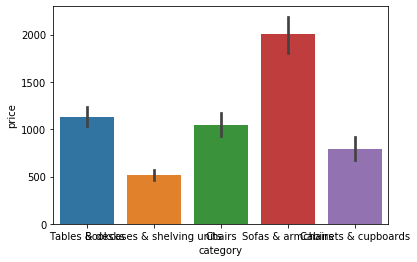

In [35]:
sns.barplot(x = 'category', y = 'price', order=['Tables & desks','Bookcases & shelving units','Chairs','Sofas & armchairs','Cabinets & cupboards'], data=data)

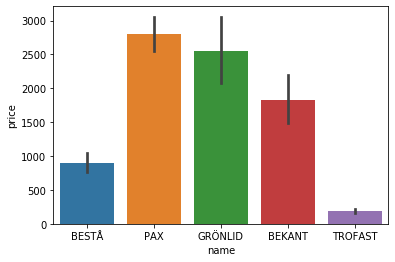

In [37]:
sns.barplot(x = 'name', y = 'price', order=['BESTÅ','PAX','GRÖNLID','BEKANT','TROFAST'], data=data)

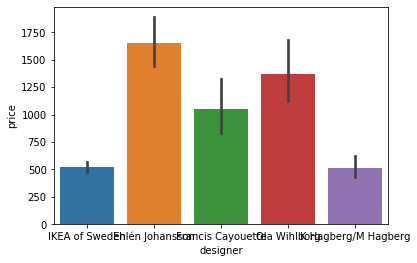

In [38]:
sns.barplot(x = 'designer', y = 'price', order=['IKEA of Sweden','Ehlén Johansson','Francis Cayouette','Ola Wihlborg','K Hagberg/M Hagberg'], data=data)

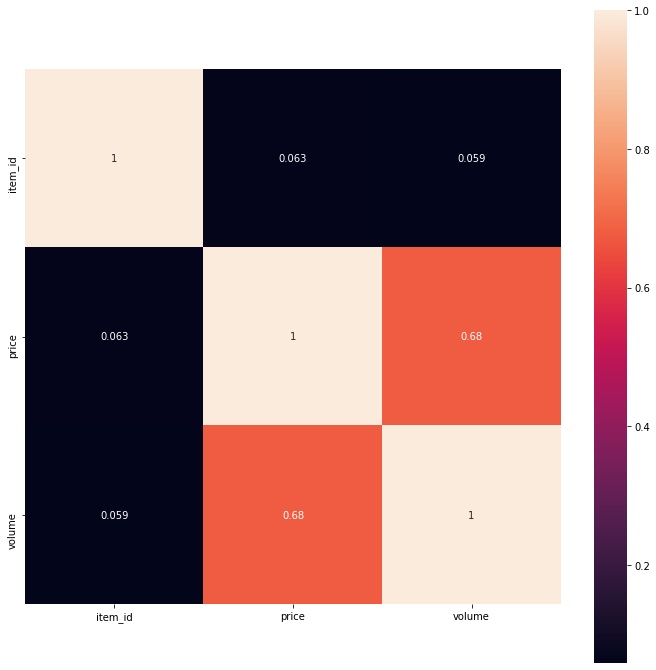

In [42]:
plt.figure(figsize=(12, 12))
correlation = data.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
sns.heatmap(correlation, vmax=1, annot=True,square=True)

In [43]:
corr_matrix=data.corr()
corr_matrix

,item_id,price,volume
item_id,1.000000,0.062683,0.058785
price,0.062683,1.000000,0.679893
volume,0.058785,0.679893,1.000000


In [44]:
test_data = data.iloc[-round(len(data)*.1):].copy()
data.drop(data.index[-round(len(data)*.1):],inplace=True)
test_data.drop('price',1,inplace=True)
print(data.shape)
print(test_data.shape)

(3325, 6)
(369, 5)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [89]:
X = data.drop(['price','category','name','designer'],1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.46)

In [90]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Linear regression accuracy: ', (linear_regression.score(X_test,y_test))*100)

Linear regression accuracy:  45.233113265821515
